# Latent Dirichlet Allocation

In [1]:
import pandas as pd

data = pd.read_csv('data', sep=",", header=None)

data.columns = ['text']

data.head()

,text
0,From: gld@cunixb.cc.columbia.edu (Gary L Dare)...
1,From: atterlep@vela.acs.oakland.edu (Cardinal ...
2,From: miner@kuhub.cc.ukans.edu\nSubject: Re: A...
3,From: atterlep@vela.acs.oakland.edu (Cardinal ...
4,From: vzhivov@superior.carleton.ca (Vladimir Z...


The data is a collection of emails that are not labelled. Let's try extract topics from them!

In [60]:
def no_mail(string=str):
    lala=string.split()
    temp = [i for i in lala if '@' not in i]
    out = ' '.join(temp)
    return out

In [63]:
import re
def remove_punctuation(oldtext):
    newtext = re.sub(r'[^A-Za-z]+', ' ', oldtext)
    return newtext
data['text'] = data['text'].apply(no_mail)
data['clean'] = data['text'].apply(remove_punctuation)
data['clean'] = data['clean'].str.lower()

data

,text,clean
0,"From: (Gary L Dare) Subject: Stan Fischler, 4/...",from gary l dare subject stan fischler summary...
1,From: (Cardinal Ximenez) Subject: Re: The arro...,from cardinal ximenez subject re the arrogance...
2,From: Subject: Re: Ancient Books Organization:...,from subject re ancient books organization uni...
3,From: (Cardinal Ximenez) Subject: Atheists and...,from cardinal ximenez subject atheists and hel...
4,From: (Vladimir Zhivov) Subject: Flames Truly ...,from vladimir zhivov subject flames truly brut...
...,...,...
1194,From: (Jerry Kaufman) Subject: Re: prayers and...,from jerry kaufman subject re prayers and advi...
1195,From: (Gerald Olchowy) Subject: Re: If You Wer...,from gerald olchowy subject re if you were pat...
1196,From: (Jayne Kulikauskas) Subject: quality of ...,from jayne kulikauskas subject quality of cath...
1197,From: (Susan Clark) Subject: Who picks first? ...,from susan clark subject who picks first organ...


In [59]:
# data['text'][0].replace
re.sub(r'[^\S@\S\s?]+', ' ', data['text'][0])

'From: gld@cunixb.cc.columbia.edu (Gary L Dare)\nSubject: Stan Fischler, 4/4\nSummary: From the Devils pregame show, prior to hosting the Penguins\nNntp-Posting-Host: cunixb.cc.columbia.edu\nReply-To: gld@cunixb.cc.columbia.edu (Gary L Dare)\nOrganization: PhDs In The Hall\nLines: 32\n\n\nAt the Lester Patrick Awards lunch, Bill Torrey mentioned that one of his\noptions next season is to be president of the Miami team, with Bob Clarke\nworking for him.  At the same dinner, Clarke said that his worst mistake\nin Philadelphia was letting Mike Keenan go -- in retrospect, almost all\nplayers came realize that Keenan knew what it took to win.  Rumours are\nnow circulating that Keenan will be back with the Flyers.\n\nNick Polano is sick of being a scapegoat for the schedule made for the\nRed Wings; After all, Bryan Murray approved it.\n\nGerry Meehan and John Muckler are worried over the Sabres\' prospects;\nAssistant Don Lever says that the Sabres have to get their share now,\nbecause a Que

In [61]:
no_mail(data['text'][0])

'From: (Gary L Dare) Subject: Stan Fischler, 4/4 Summary: From the Devils pregame show, prior to hosting the Penguins Nntp-Posting-Host: cunixb.cc.columbia.edu Reply-To: (Gary L Dare) Organization: PhDs In The Hall Lines: 32 At the Lester Patrick Awards lunch, Bill Torrey mentioned that one of his options next season is to be president of the Miami team, with Bob Clarke working for him. At the same dinner, Clarke said that his worst mistake in Philadelphia was letting Mike Keenan go -- in retrospect, almost all players came realize that Keenan knew what it took to win. Rumours are now circulating that Keenan will be back with the Flyers. Nick Polano is sick of being a scapegoat for the schedule made for the Red Wings; After all, Bryan Murray approved it. Gerry Meehan and John Muckler are worried over the Sabres\' prospects; Assistant Don Lever says that the Sabres have to get their share now, because a Quebec dynasty is emerging ... The Mighty Ducks have declared that they will not thr

## Preprocessing 

👇 You're used to it by now... Clean up! Store the cleaned text in a new dataframe column "clean_text".

In [64]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
newStopWords = ['from','re','subject']
stoplist.extend(newStopWords)

In [65]:
import os
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [66]:
tokenizer = RegexpTokenizer(r'\w\w\w\w+')
tfidf = TfidfVectorizer(lowercase=True,
                        stop_words=stoplist,
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

In [67]:
X = tfidf.fit_transform(data['clean'])

In [68]:
tfidf.get_feature_names()
# new_feature_names = [w for w in tfidf.get_feature_names() if len(w) > 3]
# new_feature_names


['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg',
 'aacc',
 'aargh',
 'aaron',
 'aatchoo',
 'abandon',
 'abandond',
 'abandoned',
 'abandoning',
 'abel',
 'aberration',
 'abhorent',
 'abhorrent',
 'abide',
 'abideth',
 'abiding',
 'abigail',
 'abilities',
 'ability',
 'abiogenesis',
 'able',
 'ably',
 'aboard',
 'abodes',
 'abolish',
 'abolished',
 'abolition',
 'abomination',
 'abortion',
 'abotu',
 'abou',
 'abound',
 'abput',
 'abraam',
 'abraham',
 'abram',
 'abri',
 'abridged',
 'abroad',
 'abscence',
 'absence',
 'absent',
 'absitinence',
 'absolut',
 'absolute',
 'absolutely',
 'absolutes',
 'absolutist',
 'absolve',
 'abstain',
 'abstaining',
 'abstinence',
 'abstinencne',
 'abstract',
 'absurd',
 'absurdity',
 'absure',
 'abundance',
 'abundant',
 'abundantly',
 'abuse',
 'abused',
 'abusers',
 'abusing',
 'abyss',
 'acad',
 'academia',
 'academic',
 'academically',
 'acadia',
 'acadien',
 'accelerator',
 'accentuates',
 'accept',
 'acceptable

## Latent Dirichlet Allocation model

👇 Train an LDA model to extract potential topics.

In [70]:
#  Define the number of topics or components
num_components=12

# Create LDA object
model=LatentDirichletAllocation(n_components=num_components)

# Fit and Transform SVD model on data
lda_matrix = model.fit_transform(X)

# Get Components 
lda_components=model.components_

In [71]:
lda_components

array([[0.08333333, 0.08333333, 0.08333334, ..., 0.08333333, 0.08333333,
        0.08333333],
       [0.08333333, 0.08333333, 0.08333333, ..., 0.08333333, 0.08333333,
        0.27995131],
       [0.08333333, 0.08333333, 0.08333333, ..., 0.08333333, 0.08333333,
        0.08333333],
       ...,
       [0.08333333, 0.08390442, 0.65360132, ..., 0.08333333, 0.08333333,
        0.08333623],
       [0.08333333, 0.08333333, 0.08333333, ..., 0.08334251, 0.08333333,
        0.08333333],
       [0.08333333, 0.08333333, 0.08333455, ..., 0.08333333, 0.08333333,
        0.08333333]])

In [72]:
terms = tfidf.get_feature_names()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:25]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['cell', 'lewis', 'tickets', 'laboratory', 'ideological', 'pregnancy', 'hammerl', 'valerie', 'wycliffe', 'lukewarm', 'lincoln', 'steele', 'ists', 'abstinence', 'denounced', 'translators', 'armstrong', 'interference', 'facts', 'deepak', 'chhabra', 'tasks', 'scalpers', 'samuelson', 'aluminum']
Topic 1:  ['captain', 'captains', 'kariya', 'picks', 'trivia', 'daigle', 'resigned', 'traded', 'striped', 'finnish', 'proselytism', 'susan', 'collingridge', 'title', 'epas', 'nasa', 'stephen', 'president', 'walsh', 'filinuk', 'stauber', 'hunch', 'evangelistic', 'panthers', 'lazarus']
Topic 2:  ['grass', 'valley', 'chuck', 'daily', 'petch', 'verse', 'certainty', 'babylon', 'norm', 'mussack', 'darren', 'doctrines', 'brent', 'bowman', 'ability', 'schism', 'wittgenstein', 'wise', 'group', 'cardinal', 'moody', 'buddhist', 'reasoning', 'fine', 'catholics']
Topic 3:  ['phillie', 'ferreira', 'catechist', 'czech', 'switzerland', 'austria', 'whore', 'republic', 'michigan', 'laurie', 'conception', '

## Visualize potential topics

👇 The function to print the words associated with the potential topics is already made for you. You just have to pass the correct arguments!

In [73]:
import matplotlib.pyplot as plt
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

IndexError: index 10 is out of bounds for axis 0 with size 10

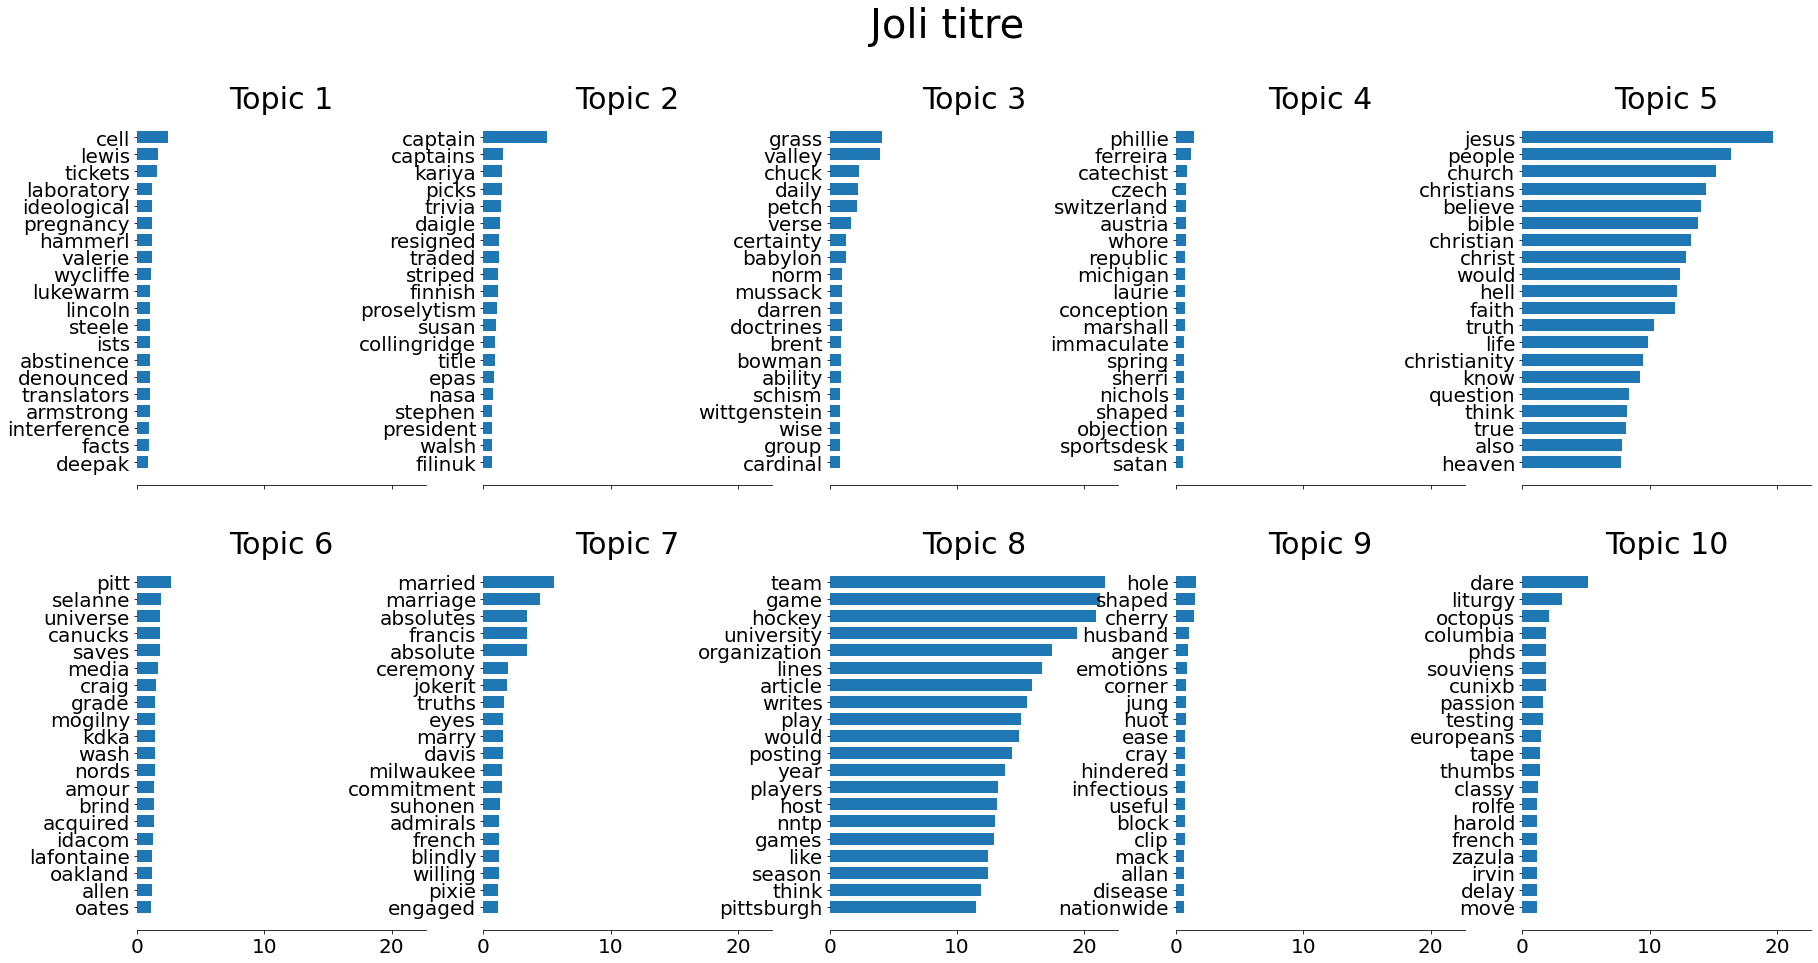

In [75]:
tf_feature_names = tfidf.get_feature_names()
plot_top_words(model,tf_feature_names,20 ,'Joli titre')

## Predict topic of new text

👇 You can now use your LDA model to predict the topic of a new text. First, use your vectorizer to vectorize the example. Then, use your LDA model to predict the topic of the vectorized example.